In [2]:
import numpy as np

import matplotlib as mp
import matplotlib.pyplot as plt
from numpy import ma
from matplotlib import ticker, cm
from munch import Munch

import sys, os
FILEPATH = os.path.realpath("__file__")[:-9]  + "/"
sys.path.append(FILEPATH)
print(FILEPATH)

#Default values, overridden if you pass in command line arguments
listfile_default = FILEPATH + "data_bounds_all.dat" 
# outfile_default = FILEPATH + "plots/PBH_bounds.png"
datadir =  FILEPATH + "data" 

outfile = FILEPATH + "plots/PBH_bounds.png"
outfile2 = FILEPATH + "plots/PBH_bounds_summary.png"


# import matplotlib as mpl 
# #Specify the plot style
# mpl.rcParams.update({'font.size': 10,'font.family':'serif'})
# mpl.rcParams['xtick.major.size'] = 7
# mpl.rcParams['xtick.major.width'] = 1
# mpl.rcParams['xtick.minor.size'] = 3
# mpl.rcParams['xtick.minor.width'] = 1
# mpl.rcParams['ytick.major.size'] = 7
# mpl.rcParams['ytick.major.width'] = 1
# mpl.rcParams['ytick.minor.size'] = 3
# mpl.rcParams['ytick.minor.width'] = 1
# mpl.rcParams['xtick.direction'] = 'in'
# mpl.rcParams['ytick.direction'] = 'in'
# mpl.rcParams['lines.linewidth'] = 1.5
# mpl.rcParams['xtick.top'] = True
# mpl.rcParams['ytick.right'] = True
# mpl.rcParams['font.family'] = 'serif'
# mpl.rc('text', usetex=True)
# mpl.rcParams['legend.edgecolor'] = 'inherit'
# from matplotlib import rc
# rc("font",**{'family':'sans-serif','sans-serif':['Helvetica']})

/home/cjoana/dev/LISA-PBH-WG/LISA_BoundsPBH/


In [3]:
#Default values, overridden if you pass in command line arguments
listfile_default = FILEPATH + "data_bounds_all.dat" 
# outfile_default = FILEPATH + "plots/PBH_bounds.png"
datadir =  FILEPATH + "data" 

outfile = FILEPATH + "plots/PBH_bounds.png"
outfile2 = FILEPATH + "plots/PBH_bounds_summary.png"

from params_bounds import *

listfile = None  # you can load a listfile here, if not read from params.

sel_files = np.loadtxt(listfile, dtype=str, unpack=True) if listfile else sel_files

print(f"listfile is  {listfile}")
print(f"selected data:   {sel_files}")

listfile is  None
selected data:   [['cmb_dist.txt', 'CMB dist', 'purple'], ['CMB.txt', 'CMB', 'purple'], ['CMB_Kamio_coll.txt', None, 'purple'], ['CMB_Kamio_photo.txt', None, 'purple'], ['CMB_Serpico_P.txt', None, 'purple'], ['Cz=1.txt', None, None], ['DG.txt', None, None], ['DynamicalFriction.txt', None, None], ['EGgamma.txt', '$\\mathrm{EG} \\gamma$', None], ['EROS.txt', 'EROS', None], ['EridanusII.txt', 'Eridanus II', None], ['Eros-Macho.txt', 'Eros-MACHO', None], ['FirstClouds.txt', 'First Clouds', None], ['GC_ep.txt', 'GC $e^\\pm$', None], ['GW.txt', 'GW', None], ['HSC_cons.txt', 'HSC', 'gold'], ['ICARUS.txt', 'ICARUS', None], ['Kepler.txt', 'Kepler', None], ['LEoT1.txt', 'LE oT1', None], ['LEoT2.txt', 'LE oT2', None], ['LIGOconstraintMono.txt', 'LIGO', 'brown'], ['LalphaForest.txt', 'L $\\alpha$', 'blue'], ['MACHO.txt', 'MACHO', None], ['OGLE.txt', 'OGLE', None], ['PlanckDisk.txt', 'Planck Disk', 'black'], ['PlanckSpherical.txt', None, 'black'], ['SNI.txt', 'SNI', 'green'], ['SN

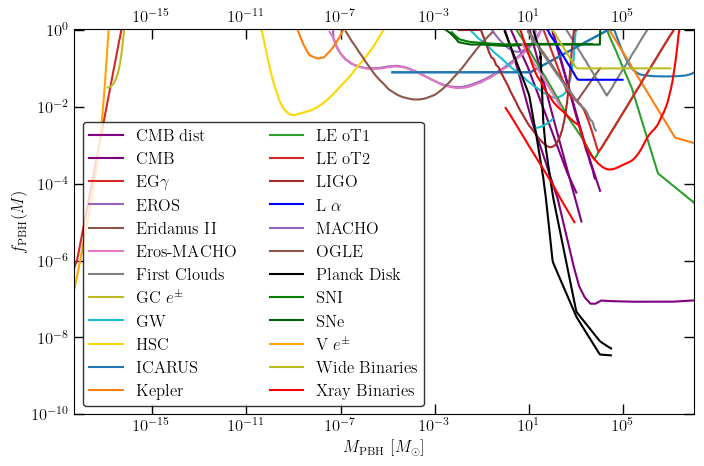

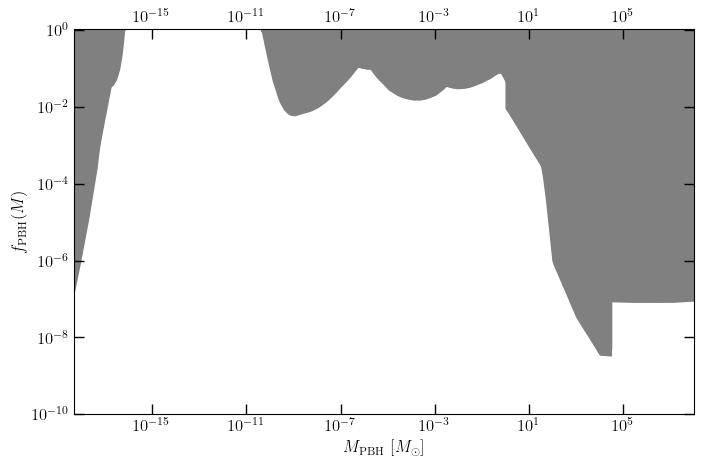

In [4]:
save_figs = False

fig, ax = plt.subplots(1,1, figsize=(8,5))
fig2, ax2 = plt.subplots(1,1, figsize=(8,5))

for bound in sel_files:

    f_bound = bound[0]
    lbl = bound[1]
    color = bound[2]

    errs = []
    # print(f"loading {f_bound}")

    try: 
        x, y = np.loadtxt( datadir + '/' + str(f_bound), unpack=True)

        # lbl = str(f_bound[:-4])
        # if color: 
        #     plt.plot(x,y,  label=lbl, color=color)
        # else:
        #     plt.plot(x,y,  label=lbl)

        asort = np.argsort(x)
        x,y = [x[asort], y[asort] ] 
        ax.plot(x,y,  label=lbl, color=color)
        ax2.fill_between(x, y, y2=1, color="gray", interpolate=True) 
    
    except Exception as e:
        mess = f" !!!! dataset {f_bound} has been skipt >> Error:\n {e}"
        errs.append[mess]
        print(mess)
    

for e in errs:
    print(e)



#Plotting stuff

# plt.axhspan(1, 1.5, facecolor='grey', alpha=0.5)

ax.legend(ncol=2)

for axs in [ax, ax2]:   
    axs.set_ylim(1e-10, 1.05)
    axs.set_xlim(5e-19, 1e8)

    axs.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)    
    axs.set_xticks(np.logspace(-18, 4, 23), minor=True)
    axs.set_xticklabels([], minor=True)
        
    axs.set_xlabel(r'$M_\mathrm{PBH}$ [$M_\odot$]')
    axs.set_ylabel(r'$f_\mathrm{PBH} (M)$')

    axs.set_xscale('log')
    axs.set_yscale('log')



if save_figs:

    fig.savefig(outfile, bbox_inches='tight', dpi=600)
    fig2.savefig(outfile2, bbox_inches='tight', dpi=600)
elif False:
    fig.show()
    fig2.show()
    
# fig.show()

    

TypeError: 'builtin_function_or_method' object is not subscriptable

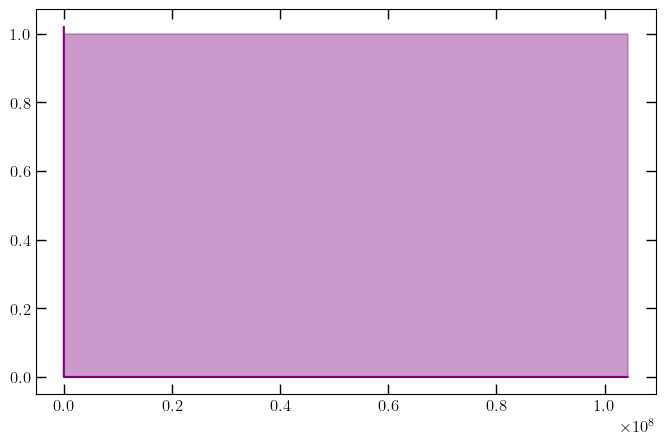

In [37]:
save_figs = False



def partial_plot(ax, xlim=None, ylim=None):

    for bound in sel_files:

        f_bound = bound[0]
        lbl = bound[1]
        color = bound[2]

        errs = []
        # print(f"loading {f_bound}")

        if not color: color = "gray"

        try: 
            x, y = np.loadtxt(datadir + '/' + str(f_bound), unpack=True)
            asort = np.argsort(x)
            x,y = [x[asort], y[asort] ] 
            ax.plot(x,y,  label=lbl, color=color)
            ax.fill_between(x, y, y2=1, color=color, interpolate=True, alpha=0.4) 

        except Exception as e:
            mess = f" !!!! dataset {f_bound} has been skipt >> Error:\n {e}"
            errs.append[mess]
            print(mess)    

        errs = []
        # print(f"loading {f_bound}")

        try: 
            x, y = np.loadtxt(datadir + '/' + str(f_bound), unpack=True)
            asort = np.argsort(x)
            x,y = [x[asort], y[asort] ] 
            ax.plot(x,y,  label=lbl, color=color)
            ax.fill_between(x, y, y2=1, color=color, interpolate=True, alpha=0.4) 

        except Exception as e:
            mess = f" !!!! dataset {f_bound} has been skipt >> Error:\n {e}"
            errs.append[mess]
            print(mess)


    for e in errs:
        print(e)

    # ax.legend(ncol=2)


    ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)    
    ax.set_xticks(np.logspace(-18, 4, 23), minor=True)
    ax.set_xticklabels([], minor=True)

    ax.set_xlabel(r'$M_\mathrm{PBH}$ [$M_\odot$]')
    ax.set_ylabel(r'$f_\mathrm{PBH} (M)$')

    ax.set_xscale('log')
    ax.set_yscale('log')

    for e in errs: 
        print(e)

    # ax.legend(ncol=2)
    ax.set_ylim(1e-10, 1.05)
    ax.set_xlim(5e-19, 1e8)
    
    if isinstance(xlim,list) :
        print("Hello")
        ax.set_xlim(xlim[0], xlim[1])
    if isinstance(ylim,list):
        ax.set_ylim(ylim[0], ylim[1])

    ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)    
    # ax.set_xticks(np.logspace(-18, 4, 23), minor=True)
    # ax.set_xticklabels([], minor=True)

    ax.set_xlabel(r'$M_\mathrm{PBH}$ [$M_\odot$]')
    ax.set_ylabel(r'$f_\mathrm{PBH} (M)$')

    ax.set_xscale('log')
    ax.set_yscale('log')

    return ax 



fig, ax = plt.subplots(1,1, figsize=(8,5))
ax = partial_plot(ax, xlim=[10**-18.5, 1e-15])


fig, ax = plt.subplots(1,1, figsize=(8,5))
ax = partial_plot(ax, xlim=[1e-11, 10**0], ylim=[1e-3,1])


fig, ax = plt.subplots(1,1, figsize=(8,5))
ax = partial_plot(ax, xlim=[1e-1, 10**10])


